In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drinks = pd.read_csv('drinks.csv')
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [2]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [3]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [4]:
# Correlation between beer_servings & wine_servings
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
print(corr)
# using pearson correlation
# diagonal : 1, correlation : 0.52.. (positive)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [5]:
# Multiple Correlations between 4 features
cols = ['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


In [6]:
# Using seaborn library (iris.data)
import seaborn as sns
iris = sns.load_dataset("iris")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


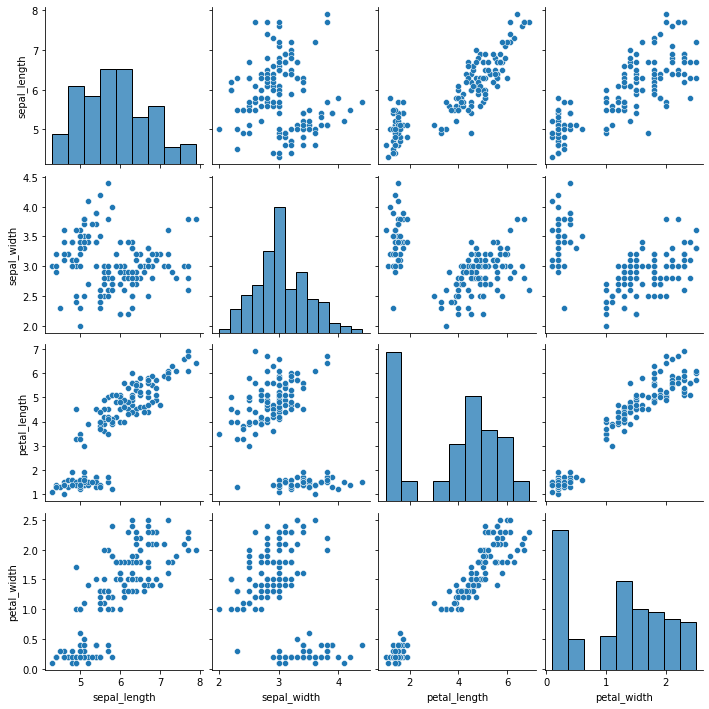

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
iris = sns.load_dataset("iris")
sns.pairplot(iris)
# pairplot()함수를 통해 다중 상관 관계 행렬에 diagonal에는 histogram, 나머지는 scatter plot
plt.show()

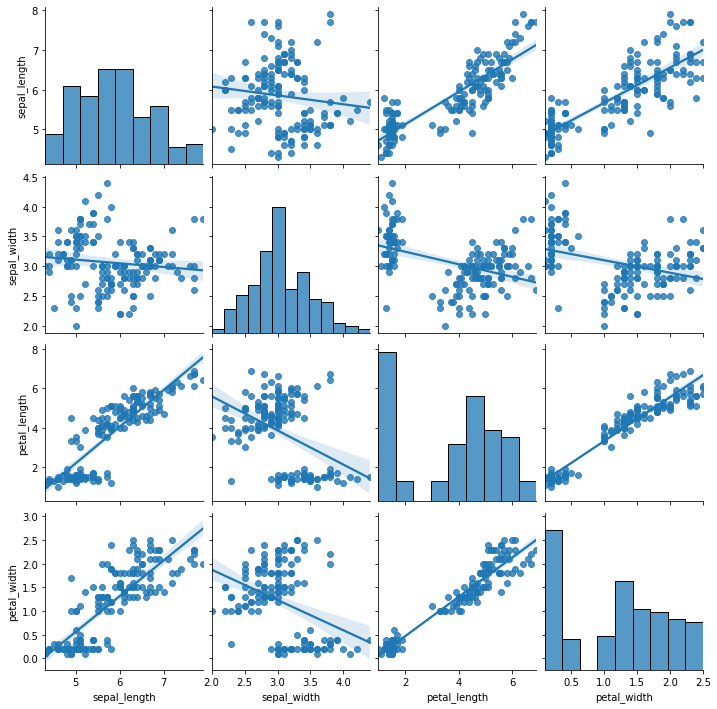

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
iris = sns.load_dataset("iris")
sns.pairplot(iris, kind = 'reg')
# kind = 'reg' option을 통해 산점도에 추세선(회귀선) 표시
plt.show()

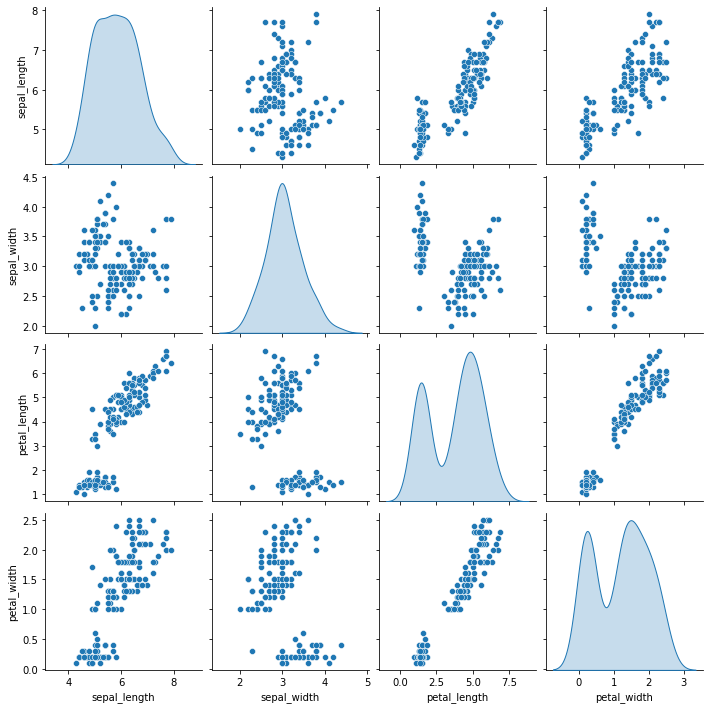

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
iris = sns.load_dataset("iris")
sns.pairplot(iris, diag_kind = 'kde')
# diag_kind = 'kde' 옵션을 추가해서 diagonal이 histogram이 아닌 density plot으로
plt.show()

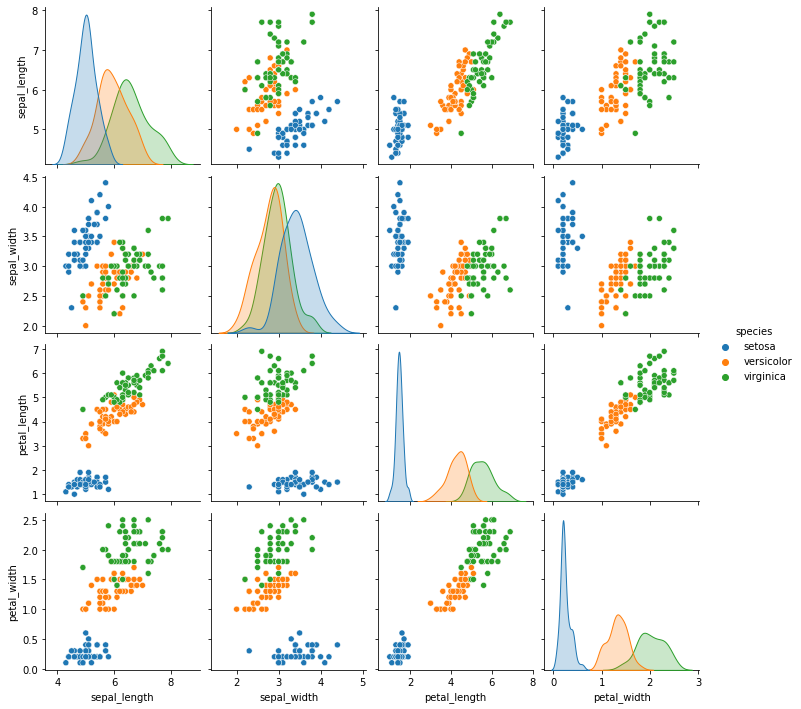

In [10]:
sns.pairplot(iris, hue = 'species')
# hue 옵션을 이용해 종별 특성을 색상으로 표시. -> 현재 예시에는 세가지 종
plt.show()

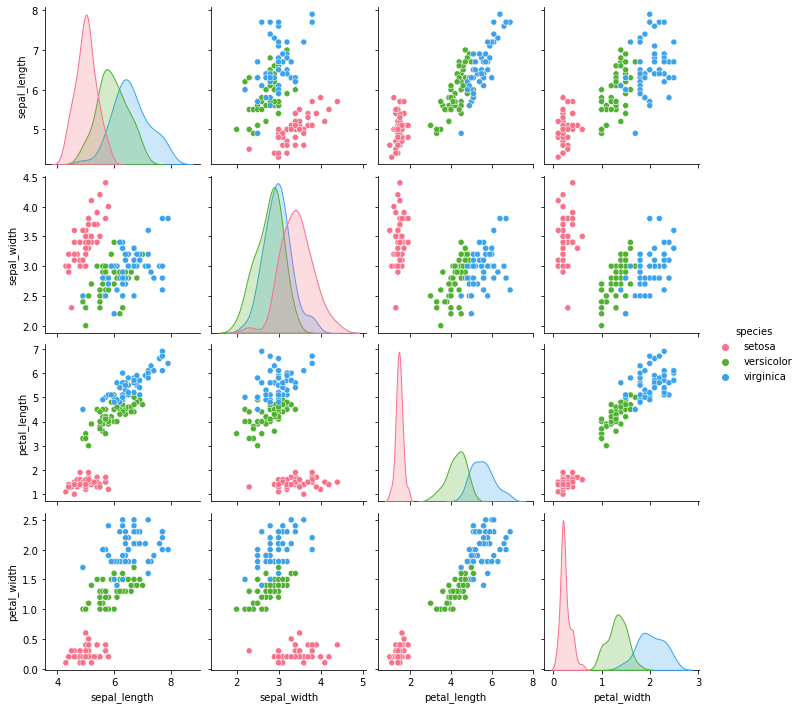

In [11]:
sns.pairplot(iris, hue = 'species', palette = 'husl')
# hue option + palette option : hue의 color set 변경
plt.show()

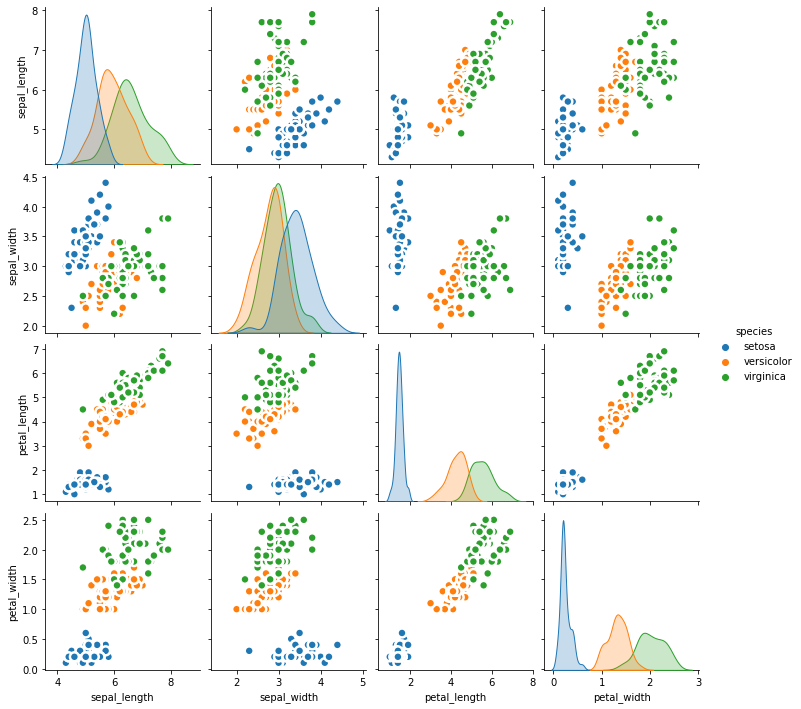

In [12]:
# option 지정으로 대각선 외의 grid에 표시되는 graph 조정가능
sns.pairplot(iris, kind = 'scatter', hue = 'species', plot_kws = dict(s=80,edgecolor = 'white', linewidth = 2.5))
# plot_kws : scatter plot 그릴때 argument를 dictionary형식으로 넣어주는데, detail option도 추가해줌
plt.show()

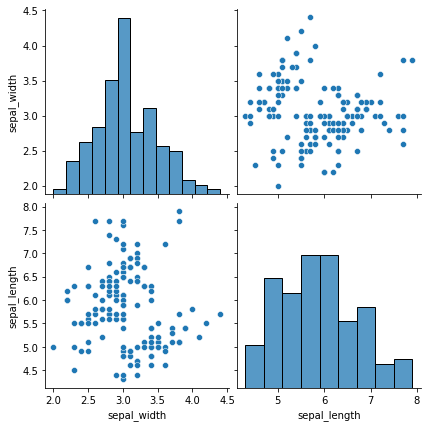

In [13]:
# vars option을 통해 필요한 column만 집중해서 확인 가능
sns.pairplot(iris, height = 3, vars = ['sepal_width','sepal_length'])
plt.show()

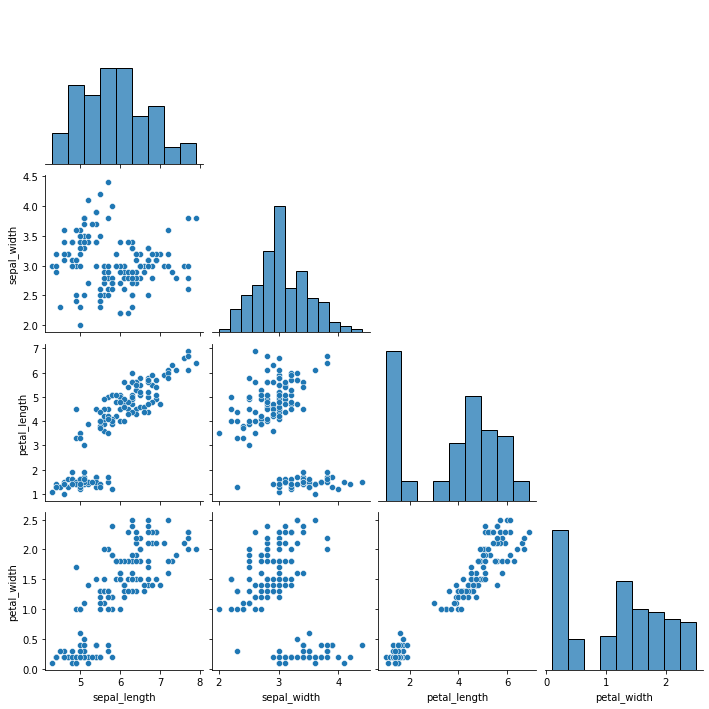

In [14]:
# 중복 Grid 제외 ==> Lower Triangle만 출력 (corner = True)
sns.pairplot(iris, corner = True)
plt.show()

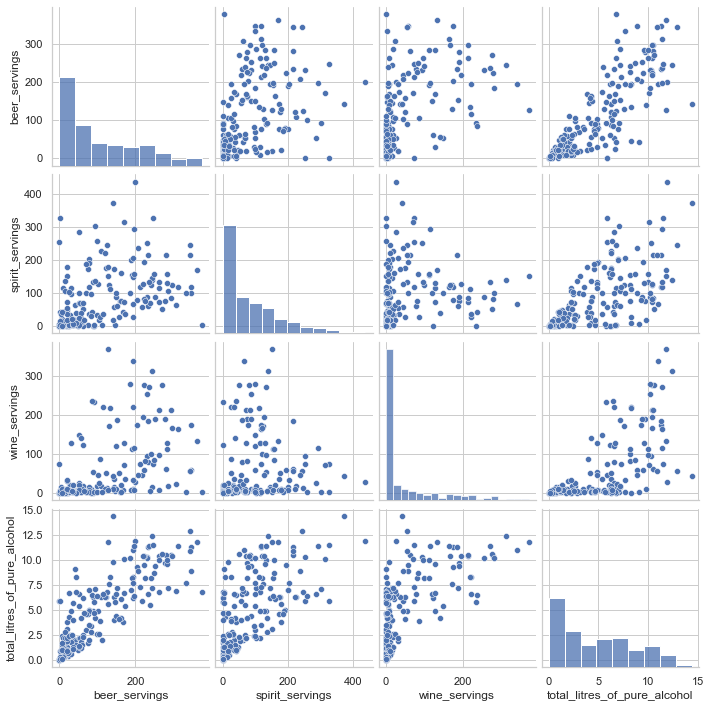

In [15]:
# back to Drinking data
import seaborn as sns
sns.set(style='whitegrid', context = 'notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']],height = 2.5)
plt.show()

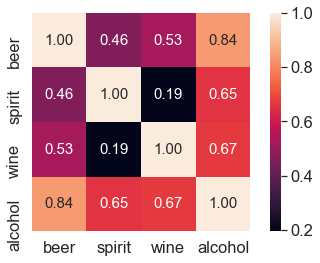

In [16]:
# Visualize Correlation with heatmap
import seaborn as sns
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method='pearson')

#corr 행렬 heatmap으로 시각화
cols_view = ['beer','spirit','wine','alcohol']
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values, cbar = True, annot=True, square=True, fmt='.2f',annot_kws = {'size':15},yticklabels = cols_view, xticklabels= cols_view)
plt.tight_layout()
plt.show()